In [143]:
import numpy as np
import matplotlib.pyplot as plt

# 关闭科学计数
np.set_printoptions(suppress=True)

# 定义训练集和测试集
x = np.array([[1,1,0],
              [0,1,0],
              [1,0,1],
              [0,0,1],
              [0,1,0],
              [1,0,0],
              [1,1,1]])
y = np.array([1,1,0,0,1,0,0])
test = [[1,0,1],
        [2,2,5],
        [2,1,4],
        [0,0,1],
        [1,1,0]]

# 激活函数
relu = lambda x: np.maximum(0, x)
sigmoid = lambda x: 1 / (1 + np.exp(-x))

# 记录损失
loss = []

# 多层神经网络
class NN:
    def __init__(self, input_size, hidden_size, output_size):
        self.w1 = np.random.randn(input_size, hidden_size)
        self.w2 = np.random.randn(hidden_size, output_size)
        self.b1 = np.zeros((input_size))
        self.b2 = np.zeros((output_size))

    # 正向传播
    def __forward(self, x):
        self.z1 = x @ self.w1 + self.b1
        self.a1 = relu(self.z1)
        self.z2 = self.a1 @ self.w2 + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    # 模型训练
    def train(self, x, y, epochs=100, rate=0.3):
        # 特征数量
        m = x.shape[1]
        y = y.reshape(-1, 1)
        for _ in range(epochs):
            # 前向传播
            a2 = self.__forward(x)

            # 计算误差损失
            loss.append(np.mean((y - a2)  ** 2))
                 
            # 反向传播
            # 人话：层的输出结果 * 上一层的误差反复更新
            # δ = yhat - y
            # 输出层结果 - 目标结果 = 输出层误差
            dt2 = a2 - y
            # 隐藏层结果 * 输出层误差 = 隐藏层误差
            dw2 = self.a1.T @ dt2
            # 预测误差和
            db2 = np.sum(dt2, axis=0)
            # 输出层误差 * 隐藏层权重 * 隐藏层结果
            dt1 = dt2 @ self.w2.T * self.a1
            
            # 输入层数据 * 隐藏层结果 = 输入层误差
            dw1 = x.T @ dt1
            # 
            db1 = np.sum(dt1, axis=0)
            
            # 梯度下降
            self.w2 -= rate * dw2
            self.b2 -= rate * db2
            self.w1 -= rate * dw1
            self.b1 -= rate * db1

    # 模型预测    
    def predict(self,x):
        return self.__forward(x)

$
\delta^{[2]} = a^{[2]} - y  \\
dw^{[2]} = a^{[1]T} \cdot \delta^{[2]}  \\
db^{[2]} = \sum(\delta^{[2]}, axis=0)  \\
\delta^{[1]} = \delta^{[2]} \cdot (w^{[2]T}) \cdot a^{[1]}  \\
dw^{[1]} = x^T \cdot \delta^{[1]}  \\
db^{[1]} = \sum(\delta^{[1]}, axis=0)  \\
$

In [144]:
# 模型测试
nn = NN(x.shape[1], 3, 1)
nn.train(x, y, epochs=1000, rate=0.3)
z = nn.predict(test)
print(z)

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.99989429]]


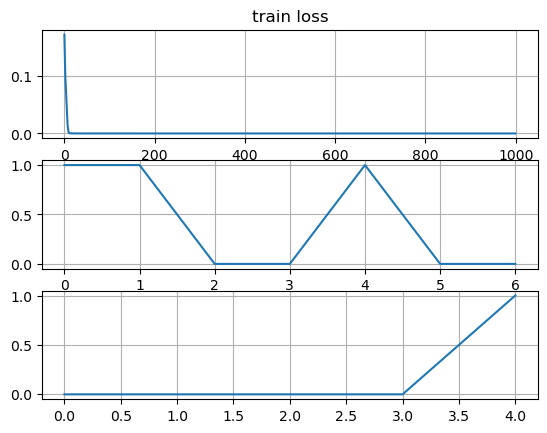

In [145]:
# 绘制训练损失图像
plt.subplot(3,1,1)
plt.plot(loss)
plt.title('train loss')
plt.grid()

# 绘制预测结果与实际结果图像
plt.subplot(3,1,2)
plt.plot(y)
plt.grid()
plt.subplot(3,1,3)
plt.plot(z)
plt.grid()